<a href="https://colab.research.google.com/github/Claudio9701/Intro-to-ML-Regression-Models/blob/main/NN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

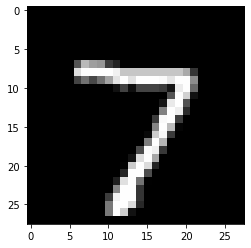

In [ ]:
plt.imshow(x_test[0], cmap='gray')
plt.show()

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # Capa de entrada
  tf.keras.layers.Dense(128, activation='relu'), # Capa oculta
  # ...
  tf.keras.layers.Dense(10, activation='softmax') # Capa de salida
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def get_label(x, y, model):
  output = model.predict(x.reshape(1,28,28)) 
  plt.imshow(x, cmap='gray')
  title = f'Real Label: {y}. Predicted Label: {output.argmax()}'
  plt.title(title)
  plt.show()

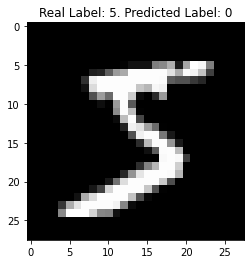

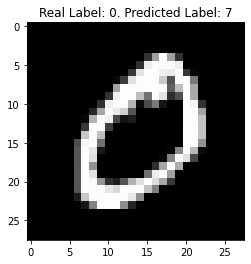

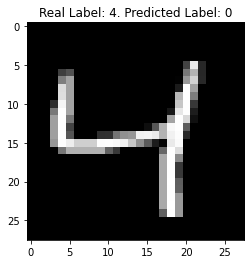

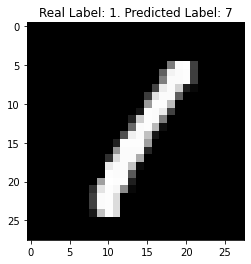

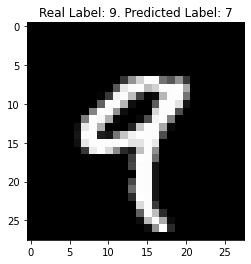

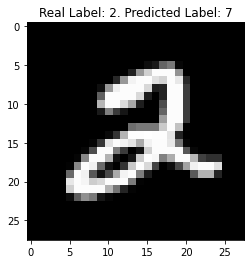

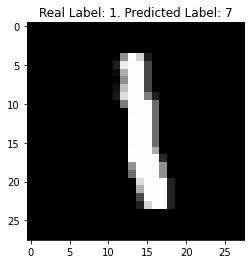

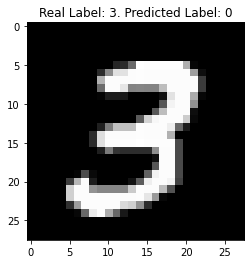

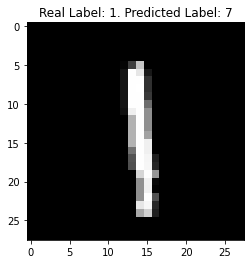

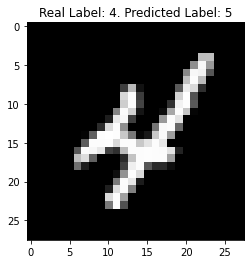

In [ ]:
for i in range(10):
  get_label(x_train[i], y_train[i], model)

In [ ]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# train model
history = model.fit(x_train, y_train, epochs=15, validation_split=0.1)

Epoch 1/15
1688/1688 [==============================] - 4s 2ms/step - loss: 0.6737 - accuracy: 0.8327 - val_loss: 0.3199 - val_accuracy: 0.9142
Epoch 2/15
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3491 - accuracy: 0.9021 - val_loss: 0.2594 - val_accuracy: 0.9248
Epoch 3/15
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2988 - accuracy: 0.9153 - val_loss: 0.2280 - val_accuracy: 0.9363
Epoch 4/15
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2691 - accuracy: 0.9242 - val_loss: 0.2114 - val_accuracy: 0.9418
Epoch 5/15
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2471 - accuracy: 0.9314 - val_loss: 0.1950 - val_accuracy: 0.9452
Epoch 6/15
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2292 - accuracy: 0.9356 - val_loss: 0.1841 - val_accuracy: 0.9483
Epoch 7/15
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2143 - accuracy: 0.9401 - val_loss: 0.1700 - val_accuracy:

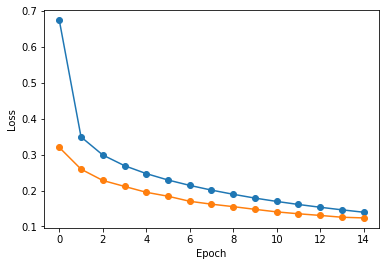

In [ ]:
# Visualize training loss
plt.plot(history.history['loss'], marker='o', label='train')
plt.plot(history.history['val_loss'], marker='o', label='valid')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

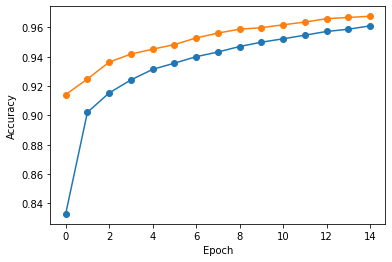

In [ ]:
# Visualize training accuracy
plt.plot(history.history['accuracy'], marker='o', label='train')
plt.plot(history.history['val_accuracy'], marker='o', label='valid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.1418 - accuracy: 0.9585


[0.14182905852794647, 0.9585000276565552]

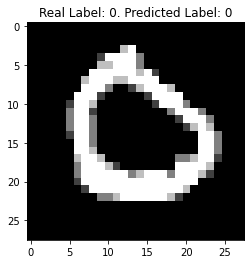

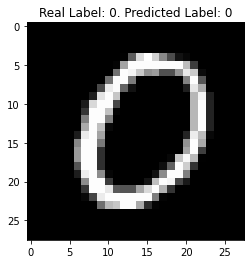

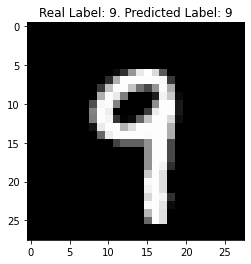

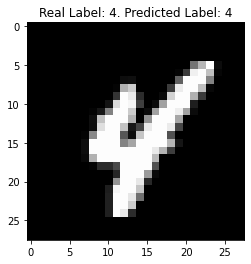

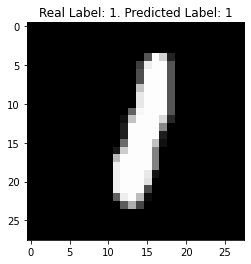

In [ ]:
# Predictions train
for i in np.random.randint(0, x_train.shape[0], size=5):
  get_label(x_train[i], y_train[i], model)

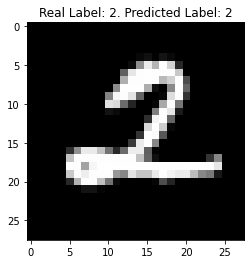

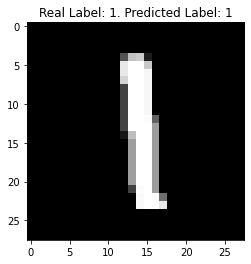

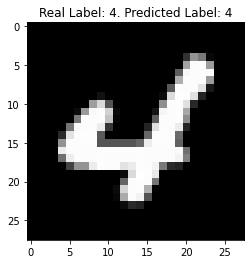

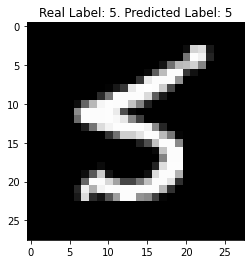

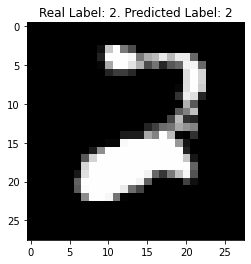

In [ ]:
# Predictions test
for i in np.random.randint(0, x_test.shape[0], size=5):
  get_label(x_test[i], y_test[i], model)